<h1> Pandas Simulation: An Inventory Problem</h1>
<br>
Jack & Jill sell t-shirts from a street stall on the upper east side.  Given the data below:
<ol>
<li> write a function run_one() that generates a 30 day profit array for Jack and Jill
<li> generate a 1000 X 30 dataframe that contains the 30 day profit arrays from 1000 simulation runs
<li> generate a 1000 X 30 dataframe that contains cumulative profits for each run
<li> report the following using these two data frames:
<ol>
<li> the mean and the standard deviation of the average daily profit from all runs
<li> the mean and the standard deviation of the cumulative 30 day profit across all runs
<li> the mean and the standard deviation of the lowest profit (greatest loss) from each run
<li> the mean and the standard deviation of the highest profit from each run
<li> the average cumulative profit for each day across runs (i.e., the average of the two day cumulative profit, average of the three day cumulative profit, etc.
<li> a line graph of the average cumulative profits for each day with day on the x-axis and average profit on the y-axis
</ol>
</ol>

In [1]:
unit_cost = 2 #What Jack and Jill pay a Shenzen based company for each t-shirt
unit_price = 5 #The selling price of each t-shirt
unit_storage_cost = 0.10  #The daily cost of storing one t-shirt overnight in inventory
shipping_days_mean = 5 #The average number of days it takes a shipment to arrive from Shenzen
shipping_days_std =2.2 #The standard deviation of shipping days. Assume normal distribution
sales_mean = 1000 #The average number of shirts sold on a given day
sales_std = 523 #The standard deviation of daily sales. Assume normal distribution
inventory = 5001 #The starting inventory
reorder_level = 5000 #The level at or below which Jack and Jill will place an order. 
order_qty = 5000 #The amount of an order. Note that when ordering, they will look at the inventory level plus 
#the amount ordered but not yet delivered

<h2>Define the run_one() function

In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from pandas_datareader import data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import datetime as dt

def non_negative_randint(mean,std,size):
    ran_list=np.random.normal(mean,std,size)
    ran_list=np.where(ran_list>=0,ran_list,0)
    ran_int=[]
    for j in ran_list:
        ran_int.append(int(j))
    return ran_int

def run_one():
    unit_cost = 2
    unit_price = 5 
    unit_storage_cost = 0.10
    shipping_days_mean = 5
    shipping_days_std =2.2
    sales_mean = 1000
    sales_std = 523
    inventory = 5001
    reorder_level = 5000
    order_qty = 5000  
    
    m=30
    daily_profit=[]
    daily_delivery=[0]*30
    
    delivery_days=non_negative_randint(shipping_days_mean,shipping_days_std,m)
    daily_demand=non_negative_randint(sales_mean,sales_std,m)
    order_status=0
    
    for i in range(m):
        
        sales=np.array([daily_demand[i],inventory]).min()
        
        inventory=inventory-sales
        
        if (inventory<=reorder_level)&((i+delivery_days[i])<m)&(order_status==0):
            daily_delivery[i+delivery_days[i]]=daily_delivery[i+delivery_days[i]]+order_qty
            order_status=1
            
        if daily_delivery[i]!=0:   
            inventory=inventory+daily_delivery[i]
            order_status=0
            
        daily_profit.append(sales*unit_price-daily_delivery[i]*unit_cost-inventory*unit_storage_cost)

    return daily_profit  

<h2>Generate dataframes

In [3]:
#generate a 1000 X 30 dataframe that contains the 30 day profit arrays from 1000 simulation runs
data={}
for n in range(1000):
    data[n]=np.array(run_one())
profit_dataframe=DataFrame(data).transpose()

#generate a 1000 X 30 dataframe that contains cumulative profits for each run
data=np.array([])
data=np.array(profit_dataframe.transpose().values[0])
data=np.vstack((data,data+profit_dataframe.transpose().values[1]))
for i in range(28):
    data=np.vstack((data,data[i+1]+profit_dataframe.transpose().values[i+2]))
cum_daily_dataframe=DataFrame(data).transpose()

<h2>Use the dataframes to answer questions

A. the mean and the standard deviation of the average daily profit from all runs: 
 2227.05015333 318.046136581 

B. the mean and the standard deviation of the cumulative 30 day profit across all runs: 
 66811.5046 9541.38409743 

C. the mean and the standard deviation of the lowest profit (greatest loss) from each run: 
 -10352.5933 638.125940298 

D. the mean and the standard deviation of the highest profit from each run 
 9604.6001 1320.96297095 

E. the average cumulative profit for each day across runs: 
 0      4351.0578
1      8376.2740
2     12036.6958
3     15066.3400
4     16650.8896
5     17441.5723
6     19022.3716
7     21368.7644
8     23810.3516
9     26110.0117
10    28179.5688
11    30296.0800
12    32123.1642
13    34234.9282
14    36135.8832
15    38248.4345
16    40228.8810
17    42599.3028
18    44688.2865
19    47207.4270
20    49072.8440
21    51278.9601
22    53315.9929
23    55492.9899
24    57782.4221
25    59700.1872
26    61591.3972
27    63241.7243
28    65

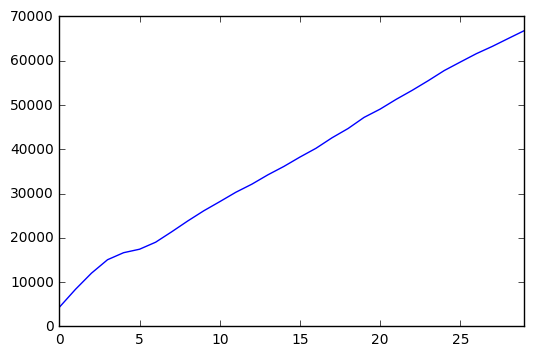

In [4]:
avg_daily=profit_dataframe.mean(axis=1)
cum_30_day=cum_daily_dataframe[29]
min_daily=profit_dataframe.min(axis=1)
max_daily=profit_dataframe.max(axis=1)

print('A. the mean and the standard deviation of the average daily profit from all runs:','\n',avg_daily.mean(),avg_daily.std(),'\n')

print('B. the mean and the standard deviation of the cumulative 30 day profit across all runs:','\n',cum_30_day.mean(),cum_30_day.std(),'\n')

print('C. the mean and the standard deviation of the lowest profit (greatest loss) from each run:','\n',min_daily.mean(),min_daily.std(),'\n')

print('D. the mean and the standard deviation of the highest profit from each run','\n',max_daily.mean(),max_daily.std(),'\n')

print('E. the average cumulative profit for each day across runs:','\n',cum_daily_dataframe.mean(),'\n')

print('F. a line graph of the average cumulative prifits for each day:','\n',cum_daily_dataframe.mean().plot())

